In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install Pyspark Library

In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 24 kB/s 
     |████████████████████████████████| 198 kB 46.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=c685cd58697c7497707edc9ab18d7fba3bc44d3fc80681bf1ced988fe8bd8f57
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


# Import Libraries

In [ ]:
#importing  some required libraries
import pandas as pd
import numpy as pd
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession, HiveContext
import plotly.io as pio
pio.renderers.default='notebook'
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.express as px
import pandas as pd
from pyspark.sql.functions import isnull, when, count, col
from pyspark.ml.feature import StringIndexer
from pyspark.sql.functions import col, countDistinct
from time import time
from pyspark.sql.functions import udf,split
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, ArrayType
from pyspark.sql.functions import concat
from pyspark.sql.functions import mean, min, max

from pyspark.ml.stat import ChiSquareTest

from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

from pyspark.ml.classification import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
#from pyspark.mllib.util import MLUtils
import numpy as np




# Initialize Spark Session for read and write from hive and read dataset files

In [ ]:
#creating spark session
sparkSession = (SparkSession
 .builder
 .appName('pyspark-read-and-write-from-hive')
 .enableHiveSupport()
 .getOrCreate())
sparkSession.conf.set("spark.sql.execution.arrow.enabled", "true")

In [ ]:
#Loading UNSWNB-15 and UNSWNB-15 features as a dataframe

data_set = sparkSession.read.csv('/content/drive/MyDrive/task_c/UNSW-NB15.csv',inferSchema=True,header=True)
data_feature = sparkSession.read.csv('/content/drive/MyDrive/task_c/UNSW-NB15_features.csv',inferSchema=True,header=True)
sparkSession = SparkSession.builder.appName("example-pyspark-read-and-write").getOrCreate()


# Dataset Analysis-First Part

In [ ]:
print(data_set.printSchema())
print(data_feature.printSchema())

root
 |-- 59.166.0.3: string (nullable = true)
 |-- 56716: integer (nullable = true)
 |-- 149.171.126.8: string (nullable = true)
 |-- 143: integer (nullable = true)
 |-- tcp: string (nullable = true)
 |-- FIN: string (nullable = true)
 |-- 0.82546002: double (nullable = true)
 |-- 7812: integer (nullable = true)
 |-- 16236: integer (nullable = true)
 |-- 31: integer (nullable = true)
 |-- 29: integer (nullable = true)
 |-- 30: integer (nullable = true)
 |-- 32: integer (nullable = true)
 |-- -: string (nullable = true)
 |-- 75090.25: double (nullable = true)
 |-- 156111.73: double (nullable = true)
 |-- 122: integer (nullable = true)
 |-- 126: integer (nullable = true)
 |-- 25518: integer (nullable = true)
 |-- 25519: integer (nullable = true)
 |-- 2751097753: long (nullable = true)
 |-- 2748686736: long (nullable = true)
 |-- 64: integer (nullable = true)
 |-- 129: integer (nullable = true)
 |-- 024: integer (nullable = true)
 |-- 025: integer (nullable = true)
 |-- 445.25928: double

In [ ]:
#no of columns in data_set
len(data_set.columns)


49

In [ ]:
#show columns of data_set
data_set.columns


['59.166.0.3',
 '56716',
 '149.171.126.8',
 '143',
 'tcp',
 'FIN',
 '0.82546002',
 '7812',
 '16236',
 '31',
 '29',
 '30',
 '32',
 '-',
 '75090.25',
 '156111.73',
 '122',
 '126',
 '25518',
 '25519',
 '2751097753',
 '2748686736',
 '64',
 '129',
 '024',
 '025',
 '445.25928',
 '474.9451',
 '1421970774',
 '1421970775',
 '6.8190908',
 '6.599896',
 '5.9700001E-4',
 '4.6899999E-4',
 '0.000128',
 '035',
 '036',
 '037',
 '038',
 '039',
 '2',
 '7',
 '142',
 '4',
 '144',
 '145',
 '146',
 '_c47',
 '048']

In [ ]:

# as columns are not name so we used UNSW_NB15 dataset feature to get all the columns
import pandas as pd

data_set = pd.read_csv("/content/drive/MyDrive/task_c/UNSW-NB15.csv",names = ['srcip','sport','dstip','dsport','proto','state','dur','sbytes','dbytes','sttl','dttl','sloss','dloss','service','Sload','Dload','Spkts','Dpkts','swin','dwin','stcpb','dtcpb','smeansz','dmeansz','trans_depth','res_bdy_len','Sjit','Djit','Stime','Ltime','Sintpkt','Dintpkt','tcprtt','synack','ackdat','is_sm_ips_ports','ct_state_ttl','ct_flw_http_mthd','is_ftp_login','ct_ftp_cmd','ct_srv_src','ct_srv_dst','ct_dst_ltm','ct_src_ ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm','attack_cat','Label'], header = None)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#first 5 rows of data_set dataframe
data_set.head()


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.3,56716,149.171.126.8,143,tcp,FIN,0.825460,7812,16236,31,...,0,2,7,1,4,1,1,1,NaN,0
1,59.166.0.0,43467,149.171.126.6,49729,tcp,FIN,0.101815,4238,65628,31,...,0,7,4,1,6,1,1,1,NaN,0
2,59.166.0.5,41289,149.171.126.2,9574,tcp,FIN,0.044003,2750,29104,31,...,0,3,5,3,3,1,1,1,NaN,0
3,59.166.0.9,43785,149.171.126.0,6881,tcp,FIN,2.790830,10476,395734,31,...,0,11,4,3,2,1,1,1,NaN,0
4,59.166.0.8,40691,149.171.126.9,6881,tcp,FIN,2.633500,13350,548216,31,...,0,16,7,7,1,1,1,1,NaN,0


In [ ]:
#creating csv file for further use
data_set.to_csv('/content/drive/MyDrive/task_c/combined.csv')


In [ ]:
#create spark dataframe to load combine.csv file
data_set = sparkSession.read.csv('/content/drive/MyDrive/task_c/combined.csv',inferSchema=True,header=True)


In [ ]:
data_set.columns


['_c0',
 'srcip',
 'sport',
 'dstip',
 'dsport',
 'proto',
 'state',
 'dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'dloss',
 'service',
 'Sload',
 'Dload',
 'Spkts',
 'Dpkts',
 'swin',
 'dwin',
 'stcpb',
 'dtcpb',
 'smeansz',
 'dmeansz',
 'trans_depth',
 'res_bdy_len',
 'Sjit',
 'Djit',
 'Stime',
 'Ltime',
 'Sintpkt',
 'Dintpkt',
 'tcprtt',
 'synack',
 'ackdat',
 'is_sm_ips_ports',
 'ct_state_ttl',
 'ct_flw_http_mthd',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_dst_ltm',
 'ct_src_ ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'attack_cat',
 'Label']

In [ ]:
#changing column names of _c0 to id and ct_src_ ltm to ct_src_ltm
data_set = data_set.withColumnRenamed("ct_src_ ltm", "ct_src_ltm")
data_set = data_set.withColumnRenamed("_c0", "id")


# Big Data Analysis using HIVE

In [ ]:
#Write our dataframe into hive table
data_set.write.saveAsTable('unsw_nb15')


In [ ]:
# Read from Hive Table
df_load = sparkSession.sql('SELECT * FROM unsw_nb15')
# df_panda=df_load.toPandas()
df_load.show()


+-------+----------+-----+-------------+------+-----+-----+------------+------+-------+----+----+-----+-----+-------+---------+---------+-----+-----+----+----+----------+----------+-------+-------+-----------+-----------+----------+----------+----------+----------+------------+------------+------------+------------+------------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+
|     id|     srcip|sport|        dstip|dsport|proto|state|         dur|sbytes| dbytes|sttl|dttl|sloss|dloss|service|    Sload|    Dload|Spkts|Dpkts|swin|dwin|     stcpb|     dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|      Sjit|      Djit|     Stime|     Ltime|     Sintpkt|     Dintpkt|      tcprtt|      synack|      ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_

<class 'pyspark.sql.dataframe.DataFrame'>


No handles with labels found to put in legend.


+------------+-------+
|Time_Convert|count  |
+------------+-------+
|2015-02-18  |1452603|
|2015-01-23  |34340  |
|2015-01-22  |1052796|
+------------+-------+



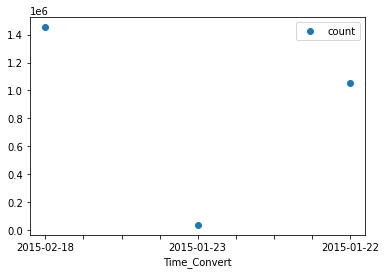

In [ ]:
# First HIVE Query This function is used to get the converted yyyy-mm-dd from unsw_nb15 dataset

# date_time=sparkSession.sql("select from_unixtime(cast(Stime as bigint),'yyyy-MM-dd HH:mm:ss.SSS') as Time_Convert from unsw_nb15")
date_time=sparkSession.sql("select from_unixtime(cast(Stime as bigint),'yyyy-MM-dd') as Time_Convert from unsw_nb15")
print(type(date_time))
# date_time.show(truncate=False)
#Write our dataframe into hive table
date_time.write.saveAsTable('date_times')
date_time=sparkSession.sql("select Time_Convert,count(Time_Convert) as count from date_times group by Time_Convert")
# # print(type(date_time))
date_time.show(truncate=False)
ax.set_title('UNSW-NB 15 Dataset Line Chart-2')
ax.legend()
date_time=date_time.toPandas()
date_time.plot(x='Time_Convert', y='count', style='o')


In [ ]:
# Second HIVE query write for using distributing function
distribute=sparkSession.sql("select  id,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes from unsw_nb15 DISTRIBUTE BY state LIMIT 10000;")
print(type(distribute))
distribute.show(truncate=False)
distribute=distribute.toPandas()

<class 'pyspark.sql.dataframe.DataFrame'>
+-------+------------+-----+--------------+------+-----+-----+------------+------+------+
|id     |srcip       |sport|dstip         |dsport|proto|state|dur         |sbytes|dbytes|
+-------+------------+-----+--------------+------+-----+-----+------------+------+------+
|73975  |175.45.176.0|768  |149.171.126.12|0     |icmp |URN  |0.0046859998|120   |0     |
|229074 |175.45.176.2|768  |149.171.126.14|0     |icmp |URN  |0.005498    |120   |0     |
|504549 |175.45.176.0|768  |149.171.126.19|0     |icmp |URN  |0.0057370001|120   |0     |
|1626054|59.166.0.9  |11404|149.171.126.4 |50433 |tcp  |ACC  |5.4400001E-4|112   |112   |
|1671241|59.166.0.0  |63430|149.171.126.0 |64243 |tcp  |ACC  |7.0799998E-4|112   |56    |
|1682727|59.166.0.7  |54260|149.171.126.5 |31536 |tcp  |ACC  |4.9900002E-4|112   |56    |
|1686742|59.166.0.1  |49127|149.171.126.8 |5190  |tcp  |ACC  |4.8700001E-4|112   |112   |
|1752961|59.166.0.5  |25740|149.171.126.3 |62388 |tcp  |AC

In [ ]:
# Data Visualization-Second Hive Query, Analyze states to find the sbyte from 10k rows
fig = px.scatter(distribute, x="state", y="sbytes",
	         size="sbytes", color="state",
                 hover_name="state",title='Sbyte in each state-bubble chart', size_max=60)
fig.show()

In [ ]:
# Data Visualization-Second Hive Query, Analyze proto to find the dsport from 10k rows

# fig = px.line(distribute, x='proto', y='dur', color='proto', markers=True)
# fig.show()
fig = px.scatter(distribute, x='proto', y='dsport', title='Analyze dsport relate to each proto',color="proto", symbol="proto")
fig.update_traces(marker_size=10)
fig.show()

In [ ]:
# Data Visualization-Second Hive Query, Analyze sport with state from 10k rows

fig = px.scatter(distribute, x="state", y="sport",title='Top 10k state duration', marginal_x="histogram", marginal_y="rug")
fig.show()


In [ ]:
# THIRD HIVE Query Order and Group By Clause to find the unique Spkts and Dpkts from dataset
group=sparkSession.sql("SElECT state, COUNT(DISTINCT Spkts) as Unique_Spkts, COUNT(DISTINCT Dpkts) as Unique_Dpkts, COUNT(*) as number_of_records, COUNT(DISTINCT dstip) as number_of_dstip FROM unsw_nb15 GROUP BY state ORDER BY state")
print(type(group))
group.show(truncate=False)
group=group.toPandas()

<class 'pyspark.sql.dataframe.DataFrame'>
+-----+------------+------------+-----------------+---------------+
|state|Unique_Spkts|Unique_Dpkts|number_of_records|number_of_dstip|
+-----+------------+------------+-----------------+---------------+
|ACC  |3           |3           |43               |18             |
|CLO  |42          |38          |161              |14             |
|CON  |535         |640         |560588           |36             |
|ECO  |4           |3           |96               |10             |
|ECR  |1           |1           |8                |4              |
|FIN  |844         |1199        |1478689          |34             |
|INT  |68          |1           |490469           |42             |
|MAS  |1           |1           |7                |5              |
|PAR  |3           |1           |26               |7              |
|REQ  |107         |1           |9043             |25             |
|RST  |10          |10          |528              |12             |
|TST  

In [ ]:
# Third Hive Query Analysis to find the number of values against each state category
fig = px.bar(group, x="state", title='Analyze each sate source and destination packets',y=["Unique_Spkts", "Unique_Dpkts", "number_of_dstip"])
fig.show()

In [ ]:
# Fourth Hive Query- to find the total number of records found for proto column
order_by=sparkSession.sql( "SELECT proto, count(*) as TotalNo FROM unsw_nb15 GROUP BY proto HAVING COUNT(*) > 1000 ORDER BY 1")
print(type(order_by))
order_by.show(truncate=False)
order_by=order_by.toPandas()

<class 'pyspark.sql.dataframe.DataFrame'>
+-----+-------+
|proto|TotalNo|
+-----+-------+
|arp  |10064  |
|ospf |7798   |
|sctp |1525   |
|tcp  |1495074|
|udp  |990435 |
|unas |16202  |
+-----+-------+



In [ ]:
# Pie Chart to analyze the Fourth Hive Query

# fig = px.line(order_by, x="proto", y="TotalNo", title="Total number of record found related to each proto") 
# fig.show()
fig = px.pie(order_by, values='TotalNo', names='proto', title='Total number of record found-Proto')
fig.show()



In [ ]:
# Fifth Hive Query to analyze the if condition on attack_cat and order by limit clause on dataset
total = sparkSession.sql('select attack_cat,state,proto, count(*) as total from unsw_nb15 where attack_cat != "null" group by attack_cat,proto,state order by total desc Limit 50')
print(type(total))
total.show(truncate=False)
total=total.toPandas()

<class 'pyspark.sql.dataframe.DataFrame'>
+---------------+-----+-----+------+
|attack_cat     |state|proto|total |
+---------------+-----+-----+------+
|Generic        |INT  |udp  |210504|
|Exploits       |FIN  |tcp  |27317 |
|Fuzzers        |FIN  |tcp  |12371 |
|Exploits       |INT  |unas |6532  |
|Reconnaissance |FIN  |tcp  |5942  |
|DoS            |INT  |unas |5246  |
|Fuzzers        |INT  |udp  |4781  |
|Reconnaissance |INT  |udp  |4173  |
|DoS            |FIN  |tcp  |3237  |
|Generic        |FIN  |tcp  |3108  |
|Fuzzers        |FIN  |tcp  |3090  |
|Exploits       |INT  |ospf |1094  |
|Reconnaissance |FIN  |tcp  |1014  |
|Fuzzers        |INT  |udp  |941   |
|Analysis       |INT  |unas |926   |
|Reconnaissance |INT  |unas |840   |
|Fuzzers        |INT  |unas |720   |
|Generic        |INT  |unas |720   |
|Reconnaissance |INT  |udp  |715   |
|DoS            |INT  |ospf |676   |
+---------------+-----+-----+------+
only showing top 20 rows



In [ ]:
# Scatter plot to analyze the number of record found in each proto
fig = px.scatter(total, y="total", x="proto", title='Scatter plot data analysis-proto',color="proto", symbol="proto")
fig.update_traces(marker_size=10)
fig.show()


In [ ]:
# Sixth Hive Query to chech the duration, state and proto values
count_dur = sparkSession.sql('select srcip,sport, dstip, dsport,proto,state,dur from unsw_nb15 where dur < 3.5 and state = "CON" and proto = "tcp"')
print(type(count_dur))
count_dur.show(truncate=False)
count_dur=count_dur.toPandas()

<class 'pyspark.sql.dataframe.DataFrame'>
+-------------+-----+--------------+------+-----+-----+------------+
|srcip        |sport|dstip         |dsport|proto|state|dur         |
+-------------+-----+--------------+------+-----+-----+------------+
|59.166.0.9   |38279|149.171.126.0 |21    |tcp  |CON  |0.021955    |
|59.166.0.9   |13637|149.171.126.0 |23211 |tcp  |CON  |0.0063200002|
|59.166.0.4   |9849 |149.171.126.3 |7813  |tcp  |CON  |0.019419    |
|59.166.0.8   |36971|149.171.126.4 |13504 |tcp  |CON  |0.072439    |
|149.171.126.4|38237|59.166.0.0    |40168 |tcp  |CON  |0.031936999 |
|59.166.0.4   |11527|149.171.126.4 |9456  |tcp  |CON  |0.030971    |
|59.166.0.4   |42506|149.171.126.0 |43209 |tcp  |CON  |0.233972    |
|59.166.0.0   |11024|149.171.126.1 |41014 |tcp  |CON  |0.024437999 |
|59.166.0.6   |35894|149.171.126.7 |143   |tcp  |CON  |1.7917711   |
|59.166.0.0   |63752|149.171.126.8 |80    |tcp  |CON  |0.191451    |
|59.166.0.0   |1916 |149.171.126.2 |1632  |tcp  |CON  |0.0281

# Handles Missing Values and Data Cleaning

In [ ]:
df_load.printSchema()

root
 |-- id: integer (nullable = true)
 |-- srcip: string (nullable = false)
 |-- sport: integer (nullable = true)
 |-- dstip: string (nullable = false)
 |-- dsport: integer (nullable = true)
 |-- proto: string (nullable = false)
 |-- state: string (nullable = false)
 |-- dur: double (nullable = true)
 |-- sbytes: integer (nullable = true)
 |-- dbytes: integer (nullable = true)
 |-- sttl: integer (nullable = true)
 |-- dttl: integer (nullable = true)
 |-- sloss: integer (nullable = true)
 |-- dloss: integer (nullable = true)
 |-- service: string (nullable = false)
 |-- Sload: double (nullable = true)
 |-- Dload: double (nullable = true)
 |-- Spkts: integer (nullable = true)
 |-- Dpkts: integer (nullable = true)
 |-- swin: integer (nullable = true)
 |-- dwin: integer (nullable = true)
 |-- stcpb: long (nullable = true)
 |-- dtcpb: long (nullable = true)
 |-- smeansz: integer (nullable = true)
 |-- dmeansz: integer (nullable = true)
 |-- trans_depth: integer (nullable = true)
 |-- res_b

In [ ]:
#Dropping unnecessary columns.. means they have no or negligible impact on results
columns_to_drop = ['srcip', 'sport', 'dstip', 'dsport','stcpb','dtcpb','Ltime', 'Stime']
df_load = df_load.drop(*columns_to_drop)


In [ ]:
#Showing columns of updated dataframe
df_load.columns


['id',
 'proto',
 'state',
 'dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'dloss',
 'service',
 'Sload',
 'Dload',
 'Spkts',
 'Dpkts',
 'swin',
 'dwin',
 'smeansz',
 'dmeansz',
 'trans_depth',
 'res_bdy_len',
 'Sjit',
 'Djit',
 'Sintpkt',
 'Dintpkt',
 'tcprtt',
 'synack',
 'ackdat',
 'is_sm_ips_ports',
 'ct_state_ttl',
 'ct_flw_http_mthd',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_dst_ltm',
 'ct_src_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'attack_cat',
 'Label']

In [ ]:
#Checking null values of dataframe


df_load.select([count(when(isnull(c), c)).alias(c) for c in df_load.columns]).show()


+---+-----+-----+---+------+------+----+----+-----+-----+-------+-----+-----+-----+-----+----+----+-------+-------+-----------+-----------+----+----+-------+-------+------+------+------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+
| id|proto|state|dur|sbytes|dbytes|sttl|dttl|sloss|dloss|service|Sload|Dload|Spkts|Dpkts|swin|dwin|smeansz|dmeansz|trans_depth|res_bdy_len|Sjit|Djit|Sintpkt|Dintpkt|tcprtt|synack|ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|Label|
+---+-----+-----+---+------+------+----+----+-----+-----+-------+-----+-----+-----+-----+----+----+-------+-------+-----------+-----------+----+----+-------+-------+------+------+------+---------------+------------+----------------+------------+----------+----------

In [ ]:
df_load.groupBy("attack_cat").count().toPandas()

,attack_cat,count
0,Worms,174
1,normal,2218456
2,Analysis,2677
3,Shellcode,1288
4,DoS,16353
5,Reconnaissance,12228
6,Reconnaissance,1759
7,Backdoor,1795
8,Fuzzers,19195
9,Exploits,44525


In [ ]:
# I see Reconnaissance occuring 2 time as one is named as Reconnaissance and another Reconnaissance + 1 space.. so I can merge them by renaming another as Reconnaissance
# Fuzzers and shellcode also doing same 
#Update dataset
from pyspark.sql import functions as F
df_load = df_load.withColumn("attack_cat", F.when(F.col("attack_cat")=='Reconnaissance ', "Reconnaissance").otherwise(F.col("attack_cat")))
df_load = df_load.withColumn("attack_cat", F.when(F.col("attack_cat")=='Fuzzers ', "Reconnaissance").otherwise(F.col("attack_cat")))
df_load = df_load.withColumn("attack_cat", F.when(F.col("attack_cat")=='Shellcode ', "Reconnaissance").otherwise(F.col("attack_cat")))

In [ ]:
df_load.groupBy("attack_cat").count().toPandas()


,attack_cat,count
0,Worms,174
1,normal,2218456
2,Analysis,2677
3,DoS,16353
4,Reconnaissance,34470
5,Backdoor,1795
6,Exploits,44525
7,Generic,215481
8,Shellcode,223
9,Backdoors,534


In [ ]:
# here null means  normal attacks, so replacing null values with  normal
df_load = df_load.na.fill('normal')


In [ ]:
# Visualize the Bar Chart for attack_cat analysis
# df_load.groupBy("attack_cat").count().show()

attack_cate=df_load.groupBy("attack_cat").count().toPandas()
attack_cate

fig = px.histogram(attack_cate, x="attack_cat", y="count",
             color='attack_cat', barmode='group')
fig.show()

In [ ]:
# As the dataset is very very large. So we are taking 1/10th of our original dataset for our further calculations

columns = df_load.schema.fieldNames()
chunks = df_load.repartition(10).rdd.mapPartitions(lambda iterator: [pd.DataFrame(list(iterator), columns=columns)]).toLocalIterator()
for pdf in chunks:
    # do work locally on chunk as pandas df
    df_x = pdf



In [ ]:
# So we have created a Pandas DataFrane and will convert it into spark dataframe


In [ ]:
df_x.head()


,id,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,1943967,tcp,FIN,0.793980,7762,11636,31,29,30,30,...,0,4,4,1,3,1,1,1,normal,0
1,1852207,tcp,FIN,1.078795,1684,10168,31,29,3,5,...,0,5,12,13,6,6,6,6,normal,0
2,2072234,udp,CON,0.001016,146,178,31,29,0,0,...,0,2,3,2,6,1,1,1,normal,0
3,192665,tcp,FIN,0.009298,2230,14994,31,29,7,11,...,0,5,2,2,2,1,1,1,normal,0
4,1864737,tcp,FIN,0.473572,2830,3667,31,29,11,14,...,3,6,6,17,23,6,6,13,normal,0


In [ ]:
# Creating Spark dataframe sdf from pandas dataframe df_x
sdf = sparkSession.createDataFrame(df_x)


In [ ]:
#Columns in our dataframe
sdf.columns


['id',
 'proto',
 'state',
 'dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'dloss',
 'service',
 'Sload',
 'Dload',
 'Spkts',
 'Dpkts',
 'swin',
 'dwin',
 'smeansz',
 'dmeansz',
 'trans_depth',
 'res_bdy_len',
 'Sjit',
 'Djit',
 'Sintpkt',
 'Dintpkt',
 'tcprtt',
 'synack',
 'ackdat',
 'is_sm_ips_ports',
 'ct_state_ttl',
 'ct_flw_http_mthd',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_dst_ltm',
 'ct_src_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'attack_cat',
 'Label']

In [ ]:
sdf.printSchema()


root
 |-- id: long (nullable = true)
 |-- proto: string (nullable = true)
 |-- state: string (nullable = true)
 |-- dur: double (nullable = true)
 |-- sbytes: long (nullable = true)
 |-- dbytes: long (nullable = true)
 |-- sttl: long (nullable = true)
 |-- dttl: long (nullable = true)
 |-- sloss: long (nullable = true)
 |-- dloss: long (nullable = true)
 |-- service: string (nullable = true)
 |-- Sload: double (nullable = true)
 |-- Dload: double (nullable = true)
 |-- Spkts: long (nullable = true)
 |-- Dpkts: long (nullable = true)
 |-- swin: long (nullable = true)
 |-- dwin: long (nullable = true)
 |-- smeansz: long (nullable = true)
 |-- dmeansz: long (nullable = true)
 |-- trans_depth: long (nullable = true)
 |-- res_bdy_len: long (nullable = true)
 |-- Sjit: double (nullable = true)
 |-- Djit: double (nullable = true)
 |-- Sintpkt: double (nullable = true)
 |-- Dintpkt: double (nullable = true)
 |-- tcprtt: double (nullable = true)
 |-- synack: double (nullable = true)
 |-- ackdat

In [ ]:
# Checking count of protocols
c_proto=sdf.groupBy("proto").count().toPandas()
c_proto=c_proto.head(15)

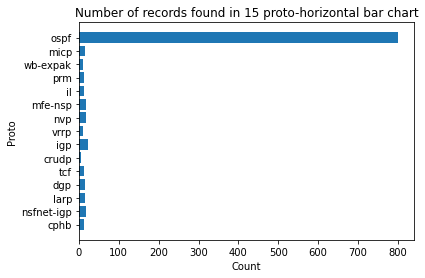

In [ ]:
# Number of records found in 15 proto-horizontal bar chart
plt.barh(c_proto['proto'],c_proto['count'])
plt.title('Number of records found in 15 proto-horizontal bar chart')
plt.ylabel('Proto')
plt.xlabel('Count')
plt.show()



In [ ]:
#Total no of rows
sdf.count()


253974

In [ ]:
#We have read our dataset and found some columns on which we can apply Indexing

# Indexing proto, state and service column's values  

indexer = StringIndexer(inputCol="proto", outputCol="xProto")
sdf = indexer.fit(sdf).transform(sdf) 
indexer = StringIndexer(inputCol="state", outputCol="xState")
sdf = indexer.fit(sdf).transform(sdf) 
indexer = StringIndexer(inputCol="service", outputCol="xSer")
sdf = indexer.fit(sdf).transform(sdf) 
# sdf.show()
sdf.toPandas()

,id,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,...,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label,xProto,xState,xSer
0,1943967,tcp,FIN,0.793980,7762,11636,31,29,30,30,...,1,3,1,1,1,normal,0,0.0,0.0,0.0
1,1852207,tcp,FIN,1.078795,1684,10168,31,29,3,5,...,13,6,6,6,6,normal,0,0.0,0.0,0.0
2,2072234,udp,CON,0.001016,146,178,31,29,0,0,...,2,6,1,1,1,normal,0,1.0,1.0,1.0
3,192665,tcp,FIN,0.009298,2230,14994,31,29,7,11,...,2,2,1,1,1,normal,0,0.0,0.0,0.0
4,1864737,tcp,FIN,0.473572,2830,3667,31,29,11,14,...,17,23,6,6,13,normal,0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253969,2184191,tcp,FIN,28.581203,18786,1087890,31,29,2,370,...,9,6,1,1,4,normal,0,0.0,0.0,0.0
253970,2523984,udp,CON,0.001599,536,304,31,29,0,0,...,5,3,1,1,3,normal,0,1.0,1.0,0.0
253971,2296554,udp,CON,0.001163,146,178,31,29,0,0,...,6,2,1,1,1,normal,0,1.0,1.0,1.0
253972,2199072,tcp,FIN,0.017929,2646,25564,31,29,7,15,...,2,6,1,1,1,normal,0,0.0,0.0,0.0


In [ ]:
#Dropping the columns which have indexed and some other columns as they also  have no or negligible impact on our results 
columns_to_drop = ['srcip','sport','dstip','Stime','Ltime','proto','state']
sdf = sdf.drop(*columns_to_drop)


In [ ]:
sdf.columns


['id',
 'dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'dloss',
 'service',
 'Sload',
 'Dload',
 'Spkts',
 'Dpkts',
 'swin',
 'dwin',
 'smeansz',
 'dmeansz',
 'trans_depth',
 'res_bdy_len',
 'Sjit',
 'Djit',
 'Sintpkt',
 'Dintpkt',
 'tcprtt',
 'synack',
 'ackdat',
 'is_sm_ips_ports',
 'ct_state_ttl',
 'ct_flw_http_mthd',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_dst_ltm',
 'ct_src_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'attack_cat',
 'Label',
 'xProto',
 'xState',
 'xSer']

In [ ]:
#Checking number of distinct values in each columns


for column_name in sdf.columns:
    count_distinct=sdf.agg(countDistinct(col(column_name).alias("distinct_counts"))).head()[0]
    print('The number of distinct values of '+column_name+ ' is ' +str(count_distinct))


The number of distinct values of id is 253974
The number of distinct values of dur is 108868
The number of distinct values of sbytes is 4254
The number of distinct values of dbytes is 5249
The number of distinct values of sttl is 13
The number of distinct values of dttl is 8
The number of distinct values of sloss is 175
The number of distinct values of dloss is 454
The number of distinct values of service is 13
The number of distinct values of Sload is 146980
The number of distinct values of Dload is 147176
The number of distinct values of Spkts is 547
The number of distinct values of Dpkts is 724
The number of distinct values of swin is 7
The number of distinct values of dwin is 5
The number of distinct values of smeansz is 1041
The number of distinct values of dmeansz is 1229
The number of distinct values of trans_depth is 6
The number of distinct values of res_bdy_len is 693
The number of distinct values of Sjit is 146321
The number of distinct values of Djit is 153165
The number of

In [ ]:

#Checking time taken to perform some queries given below


t0 = time()
sdf.select("xProto", "Djit", "dbytes").groupBy("xProto").count().show()
tt = time() - t0

print("Query performed in {} seconds".format(round(tt,3)))


+------+------+
|xProto| count|
+------+------+
|   8.0|    34|
|  67.0|    14|
|  70.0|    13|
|   0.0|150016|
|  69.0|    14|
|   7.0|    35|
| 112.0|    10|
| 124.0|     7|
| 128.0|     6|
| 108.0|    10|
|  88.0|    12|
|  49.0|    16|
| 101.0|    11|
| 116.0|     9|
|  98.0|    11|
| 107.0|    10|
|  29.0|    17|
|  75.0|    13|
|  64.0|    14|
|  47.0|    16|
+------+------+
only showing top 20 rows

Query performed in 1.086 seconds


In [ ]:
t0 = time()
sdf.select("xProto", "Djit", "dbytes").filter(sdf.Djit<1000).filter(sdf.dbytes > 1000).groupBy("xProto").count().show()
tt = time() - t0

print("Query performed in {} seconds".format(round(tt,3)))


+------+------+
|xProto| count|
+------+------+
|   0.0|110508|
|   1.0|    20|
|   3.0|     1|
|   5.0|    15|
|  19.0|     1|
+------+------+

Query performed in 1.244 seconds


In [ ]:
t0 = time()
sdf.select("Label").groupBy("Label").count().show()
tt = time() - t0

print("Query performed in {} seconds".format(round(tt,3)))


+-----+------+
|Label| count|
+-----+------+
|    0|222115|
|    1| 31859|
+-----+------+

Query performed in 0.918 seconds


In [ ]:
t0 = time()
sdf.select("attack_cat").groupBy("attack_cat").count().show()
tt = time() - t0

print("Query performed in {} seconds".format(round(tt,3)))


+--------------+------+
|    attack_cat| count|
+--------------+------+
|         Worms|    14|
|     Shellcode|    24|
|     Backdoors|    42|
|        normal|222115|
|       Fuzzers|   470|
|      Analysis|   244|
|           DoS|  1651|
|Reconnaissance|  3337|
|      Backdoor|   180|
|      Exploits|  4558|
|       Generic| 21339|
+--------------+------+

Query performed in 0.864 seconds


In [ ]:
#Trying some operations on some columns of our dataset (Not necessary for our calculations..) 


In [ ]:

# Create a function for all the data manipulations
def new_cols(sbytes,dbytes):
 if sbytes<4400: sb_Category='Small'
 elif sbytes<8000: sb_Category='Medium'
 else: sb_Category='Large'
 if dbytes<1000: db_Category='Low'
 elif dbytes<4000: db_Category='Mid'
 else: db_Category='High'
 return sb_Category,db_Category

# Apply the user defined function on the dataframe
udfB=udf(new_cols,StructType([StructField("sb_Category", StringType(), True),StructField("db_Category", StringType(), True)]))

dff=sdf.select('id','sbytes','dbytes').withColumn("newcat",udfB("sbytes","dbytes"))

# Unbundle the struct type columns into individual columns and drop the struct type 
dff1 = dff.select('id','sbytes','dbytes','newcat').withColumn('db_Category', dff.newcat.getItem('db_Category')).withColumn('sb_Category', dff.newcat.getItem('sb_Category')).drop('newcat')

dff1.toPandas()


,id,sbytes,dbytes,db_Category,sb_Category
0,1943967,7762,11636,High,Medium
1,1852207,1684,10168,High,Small
2,2072234,146,178,Low,Small
3,192665,2230,14994,High,Small
4,1864737,2830,3667,Mid,Small
...,...,...,...,...,...
253969,2184191,18786,1087890,High,Large
253970,2523984,536,304,Low,Small
253971,2296554,146,178,Low,Small
253972,2199072,2646,25564,High,Small


In [ ]:
dff1 =dff1.withColumn('sbdb_Category', concat(dff1.db_Category,dff1.sb_Category))
dff1.toPandas()


,id,sbytes,dbytes,db_Category,sb_Category,sbdb_Category
0,1943967,7762,11636,High,Medium,HighMedium
1,1852207,1684,10168,High,Small,HighSmall
2,2072234,146,178,Low,Small,LowSmall
3,192665,2230,14994,High,Small,HighSmall
4,1864737,2830,3667,Mid,Small,MidSmall
...,...,...,...,...,...,...
253969,2184191,18786,1087890,High,Large,HighLarge
253970,2523984,536,304,Low,Small,LowSmall
253971,2296554,146,178,Low,Small,LowSmall
253972,2199072,2646,25564,High,Small,HighSmall


In [ ]:
#droping duplicate rows if there exist

sdf = sdf.dropDuplicates()


In [ ]:
#Showing 10 rows of our dataframe
sdf.toPandas()



,id,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,...,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label,xProto,xState,xSer
0,1997513,0.006490,3728,5474,31,29,7,7,ssh,4.452388e+06,...,1,1,1,1,1,normal,0,0.0,0.0,6.0
1,1786829,0.021443,37188,3276,31,29,18,8,smtp,1.360742e+07,...,2,2,1,1,1,normal,0,0.0,0.0,4.0
2,212687,0.235354,8928,320,31,29,4,1,ftp-data,2.818223e+05,...,4,2,1,1,4,normal,0,0.0,0.0,3.0
3,90552,0.006307,424,8824,31,29,1,4,ftp-data,4.705882e+05,...,4,4,1,1,4,normal,0,0.0,0.0,3.0
4,1821098,6.968985,15842,725686,31,29,27,260,-,1.812028e+04,...,12,12,9,5,11,normal,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253969,2411901,0.004540,1064,2260,31,29,4,4,-,1.719824e+06,...,6,3,1,1,1,normal,0,0.0,0.0,0.0
253970,2416211,1.005767,1580,10168,31,29,3,5,http,1.152553e+04,...,3,5,1,1,1,normal,0,0.0,0.0,2.0
253971,2170069,0.194594,8928,424,31,29,4,1,-,3.408533e+05,...,1,2,1,1,1,normal,0,0.0,0.0,0.0
253972,2207848,0.033947,12856,13202,31,29,35,33,ssh,3.006569e+06,...,1,1,1,1,1,normal,0,0.0,0.0,6.0


In [ ]:
#Check total no of rows after dropping duplicates
sdf.count()


253974

# Data Analytics-Phase

### Method -1 Descriptive Statistic


---



In [ ]:
# on first few columns
sdf.describe('sbytes','dbytes','dur','sttl','dttl','sloss','dloss','Sload','Dload').show()


+-------+------------------+-----------------+------------------+-----------------+------------------+-----------------+-----------------+--------------------+------------------+
|summary|            sbytes|           dbytes|               dur|             sttl|              dttl|            sloss|            dloss|               Sload|             Dload|
+-------+------------------+-----------------+------------------+-----------------+------------------+-----------------+-----------------+--------------------+------------------+
|  count|            253974|           253974|            253974|           253974|            253974|           253974|           253974|              253974|            253974|
|   mean| 4211.746265365746|36070.59120618646|0.6666178997385006|62.47208375660501|30.817028514729856|5.143345381810737|16.24568262893052| 3.679944705652993E7|2473949.8743160353|
| stddev|46120.172421558986|164180.4440127226|17.778049453746622|74.27228294757727|  42.9200224359801|18.

In [ ]:
#On next few columns
sdf.describe('Spkts','Dpkts','swin','dwin','smeansz','dmeansz','trans_depth','res_bdy_len','Sjit').show()


+-------+-----------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+-----------------+
|summary|            Spkts|             Dpkts|              swin|              dwin|           smeansz|           dmeansz|        trans_depth|       res_bdy_len|             Sjit|
+-------+-----------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+-----------------+
|  count|           253974|            253974|            253974|            253974|            253974|            253974|             253974|            253974|           253974|
|   mean|33.17326576736201| 42.57847653696835|150.61339743438305|150.28046177955224|  124.127099624371| 276.9438840196241|0.08276831486687614|4068.7436666745416|1640.961976730686|
| stddev|72.02732975179526|123.96923846007788|125.38692839704566|125.44829868245404|151.832182361121

In [ ]:
sdf.describe('Djit','Sintpkt','Dintpkt','tcprtt','synack','ackdat','ct_srv_src','ct_srv_dst').show()


+-------+------------------+------------------+------------------+--------------------+--------------------+--------------------+------------------+------------------+
|summary|              Djit|           Sintpkt|           Dintpkt|              tcprtt|              synack|              ackdat|        ct_srv_src|        ct_srv_dst|
+-------+------------------+------------------+------------------+--------------------+--------------------+--------------------+------------------+------------------+
|  count|            253974|            253974|            253974|              253974|              253974|              253974|            253974|            253974|
|   mean|  729.578801566768|197.22447830076655| 82.27910735524847|0.006214318496382919|0.003290839337315...|0.002923479160385...| 9.179427815445676|  8.97852536086371|
| stddev|3394.0956934707265| 2794.719519219864|1460.9810861701628| 0.04691026966717318| 0.02589659337729759| 0.02474320407928153|10.807461170779472|10.791822397

In [ ]:
#On last few columns
sdf.describe('ct_dst_ltm','ct_src_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm').show()


+-------+-----------------+-----------------+-----------------+-----------------+------------------+
|summary|       ct_dst_ltm|       ct_src_ltm| ct_src_dport_ltm| ct_dst_sport_ltm|    ct_dst_src_ltm|
+-------+-----------------+-----------------+-----------------+-----------------+------------------+
|  count|           253974|           253974|           253974|           253974|            253974|
|   mean|6.435304401237922|6.879519163378928|4.628639152039185|3.594375802247474| 6.826726357816154|
| stddev|8.126624276460975|8.171545432785253|8.441364375330181|6.179555590400813|11.225692932988153|
|    min|                1|                1|                1|                1|                 1|
|    max|               67|               67|               67|               60|                67|
+-------+-----------------+-----------------+-----------------+-----------------+------------------+



### Method 2 : Statistical Data Analysis

In [ ]:
#for some features calculating mean , min and max
colms = ['sbytes','dbytes','sttl','dttl','sloss','dloss','Sload','Dload']
for i in range(len(colms)):
    clm = colms[i]
    sdf.select([mean(clm), min(clm), max(clm)]).show()


+-----------------+-----------+-----------+
|      avg(sbytes)|min(sbytes)|max(sbytes)|
+-----------------+-----------+-----------+
|4211.746265365746|          0|   10126002|
+-----------------+-----------+-----------+

+-----------------+-----------+-----------+
|      avg(dbytes)|min(dbytes)|max(dbytes)|
+-----------------+-----------+-----------+
|36070.59120618646|          0|   14655417|
+-----------------+-----------+-----------+

+-----------------+---------+---------+
|        avg(sttl)|min(sttl)|max(sttl)|
+-----------------+---------+---------+
|62.47208375660501|        0|      255|
+-----------------+---------+---------+

+------------------+---------+---------+
|         avg(dttl)|min(dttl)|max(dttl)|
+------------------+---------+---------+
|30.817028514729856|        0|      254|
+------------------+---------+---------+

+-----------------+----------+----------+
|       avg(sloss)|min(sloss)|max(sloss)|
+-----------------+----------+----------+
|5.143345381810737|      

### Method 3 : Covariance

In [ ]:
#Sample covarience on some pairs of columns

print("Covariance between sbytes and dbytes", sdf.stat.cov('sbytes', 'dbytes'))
print("Covariance between sloss and dloss", sdf.stat.cov('sloss', 'dloss'))
print("Covariance between Sload and Dload",sdf.stat.cov('Sload', 'Dload'))
print("Covariance between swin and dwin",sdf.stat.cov('swin', 'dwin'))


Covariance between sbytes and dbytes 423584518.6973115
Covariance between sloss and dloss 195.2023824509329
Covariance between Sload and Dload -87925079438692.81
Covariance between swin and dwin 15686.493240229282


### Method 4 : Correlations

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


[[1.0, 0.05594067866847218, 0.025587559916257493, -0.016319172289059058, 0.06878511210038364, 0.9340438177604418, 0.06127279980982866, -0.024874965344017525, -0.006811263493652747, 0.5429031514822943, 0.11070962338559334, 0.07057018646051796, 0.07075692706036717, 0.20827459662198278, 0.020737584728562988, 0.00201060093188186, 0.023431209985200655, 0.0009258605122648179, 0.0019359097417438141, -0.00571811708415902, -0.003471780917738189, 0.029752400054313653, 0.027076323286982378, 0.02806865952059312, -0.040913468267988314, -0.04090612128975237, -0.0328923589326614, -0.0323504382708298, -0.03277459707089802, -0.032980913628845296, -0.036672188442186025], [0.05594067866847218, 1.0, 0.06811405124207745, -0.09052812443423536, 0.015475679106360253, 0.13358780940430856, 0.9915684098926074, -0.0680851244575349, 0.08277393626153522, 0.7530356136833104, 0.9723403971514026, 0.18232873132953928, 0.18282252320945191, -0.09119210706148881, 0.5743111657170197, 0.08311393591691127, 0.5157989322881769

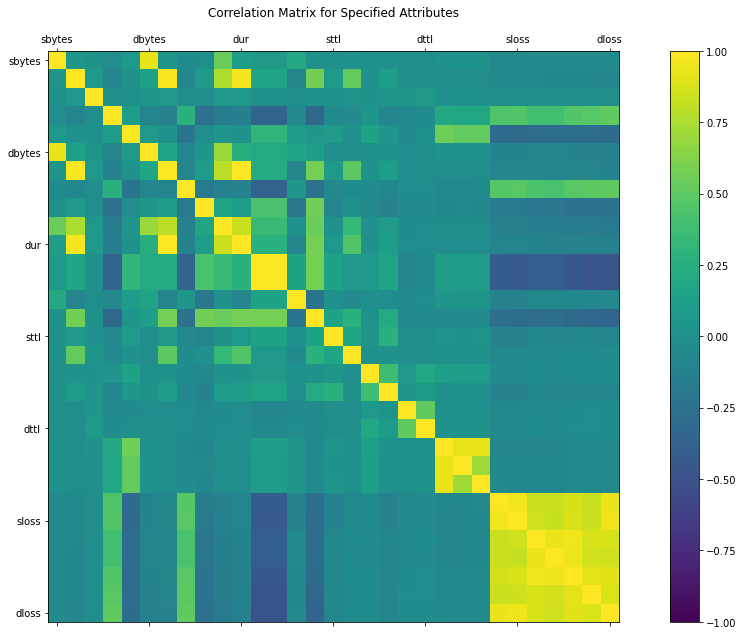

In [ ]:
columns = ['sbytes','dbytes','dur','sttl','dttl','sloss','dloss','Sload','Dload','Spkts','Dpkts','swin','dwin','smeansz','dmeansz','trans_depth','res_bdy_len','Sjit',
          'Djit','Sintpkt','Dintpkt','tcprtt','synack','ackdat','ct_srv_src','ct_srv_dst','ct_dst_ltm','ct_src_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm']


vector_col = "corr_features"
assembler = VectorAssembler(inputCols = columns, 
                            outputCol = vector_col)
myGraph_vector = assembler.transform(sdf).select(vector_col)
matrix = Correlation.corr(myGraph_vector, vector_col)


matrix = Correlation.corr(myGraph_vector, vector_col).collect()[0][0]
corrmatrix = matrix.toArray().tolist()
print(corrmatrix)


df = sparkSession.createDataFrame(corrmatrix,columns)
df.show()

def plot_corr_matrix(correlations,attr,fig_no):
    fig=plt.figure(fig_no)
    ax=fig.add_subplot(111)
    ax.set_title("Correlation Matrix for Specified Attributes")
    ax.set_xticklabels(['']+attr)
    ax.set_yticklabels(['']+attr)
    cax=ax.matshow(correlations,vmax=1,vmin=-1)
    fig.colorbar(cax)
    fig.set_size_inches(18.5, 10.5, forward=True)

    plt.show()

plot_corr_matrix(corrmatrix, columns, 234)


In [ ]:
#another method to calculate correlation between some pairs
# correlation on some pairs of columns
print("Correlation between sbytes and dbytes", sdf.stat.corr('sbytes', 'dbytes'))
print("Correlation between sloss and dloss", sdf.stat.corr('sloss', 'dloss'))
print("Correlation between Sload and Dload",sdf.stat.corr('Sload', 'Dload'))
print("Correlation between swin and dwin",sdf.stat.corr('swin', 'dwin'))
print("Correlation between swin and dwin",sdf.stat.corr('sttl', 'dttl'))


Correlation between sbytes and dbytes 0.055940678668439395
Correlation between sloss and dloss 0.17744511850852027
Correlation between Sload and Dload -0.17575163441777084
Correlation between swin and dwin 0.9972609813585644
Correlation between swin and dwin 0.11449872222567677


### Method 5 : Frequents items

In [ ]:
#Frequent Items:  the following code finds the frequent items that show up 40% of the time for each column

sdf.stat.freqItems(['sbytes','dbytes','dur','sttl','dttl','sloss','dloss','Sload','Dload','Spkts','Dpkts','swin','dwin',
                    'smeansz','dmeansz','trans_depth','res_bdy_len','Sjit'], 0.4).collect()[0]


Row(sbytes_freqItems=[], dbytes_freqItems=[0], dur_freqItems=[], sttl_freqItems=[254, 31], dttl_freqItems=[29, 0], sloss_freqItems=[7, 0], dloss_freqItems=[0], Sload_freqItems=[], Dload_freqItems=[0.0], Spkts_freqItems=[2], Dpkts_freqItems=[0], swin_freqItems=[255, 0], dwin_freqItems=[255, 0], smeansz_freqItems=[], dmeansz_freqItems=[0], trans_depth_freqItems=[1, 0], res_bdy_len_freqItems=[3924, 0], Sjit_freqItems=[0.0])

In [ ]:
#Displaying dataframe
display(sdf)


DataFrame[id: bigint, dur: double, sbytes: bigint, dbytes: bigint, sttl: bigint, dttl: bigint, sloss: bigint, dloss: bigint, service: string, Sload: double, Dload: double, Spkts: bigint, Dpkts: bigint, swin: bigint, dwin: bigint, smeansz: bigint, dmeansz: bigint, trans_depth: bigint, res_bdy_len: bigint, Sjit: double, Djit: double, Sintpkt: double, Dintpkt: double, tcprtt: double, synack: double, ackdat: double, is_sm_ips_ports: bigint, ct_state_ttl: bigint, ct_flw_http_mthd: bigint, is_ftp_login: bigint, ct_ftp_cmd: bigint, ct_srv_src: bigint, ct_srv_dst: bigint, ct_dst_ltm: bigint, ct_src_ltm: bigint, ct_src_dport_ltm: bigint, ct_dst_sport_ltm: bigint, ct_dst_src_ltm: bigint, attack_cat: string, Label: bigint, xProto: double, xState: double, xSer: double]

### Method 6 : Hypothesis Testing

In [ ]:
#For Hypothesis testing we need features column which will be creted after Vectorization

#Vectorizing data


colmss = ['sbytes','dbytes','dur','sttl','dttl','sloss','dloss','Sload','Dload','Spkts','Dpkts','swin','dwin','smeansz','dmeansz','trans_depth','res_bdy_len','Sjit',
          'Djit','Sintpkt','Dintpkt','tcprtt','synack','ackdat','ct_srv_src','ct_srv_dst','ct_dst_ltm','ct_src_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm']
feature = VectorAssembler(inputCols= colmss[:],outputCol="features")
sdf1 = feature.transform(sdf)

In [ ]:
# Hypothesis testing with chi square test

r = ChiSquareTest.test(sdf1, "features", "Label").head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))

pValues: [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
degreesOfFreedom: [4318, 5285, 108541, 12, 8, 202, 449, 146482, 146591, 563, 722, 3, 6, 1055, 1232, 4, 686, 145986, 152766, 134331, 133414, 11604, 10992, 9925, 64, 65, 61, 61, 61, 54, 64]
statistics: [235889.7089327499,125417.61050509117,158776.7660240138,220970.88886807594,121369.29161590226,34013.892536496205,35227.24849013682,250935.94486954328,140214.44670830702,50277.68440922889,97146.30979576836,24625.405706911733,24436.994175077158,185073.2266870845,113489.75770366576,420.5533572611072,8416.946473788968,82937.07079384707,85423.85686315053,105358.40333278086,139303.46754434708,74846.24212163987,74562.29526127853,74429.32838728814,50806.203458719894,53378.31713062498,56339.10611400858,52712.18526471626,68640.4389308684,73261.45464566028,62940.29793089511]


In [ ]:
sdf1.groupBy("features").count().show()


+--------------------+-----+
|            features|count|
+--------------------+-----+
|(31,[0,2,3,7,9,13...|   10|
|[146.0,178.0,9.45...|    1|
|(31,[0,2,3,7,9,13...|    4|
|[534.0,268.0,0.51...|    1|
|(31,[0,2,3,7,9,13...|    2|
|[2354.0,5506.0,0....|    1|
|[1042.0,824.0,0.0...|    1|
|(31,[0,2,3,7,9,13...|   36|
|[132.0,164.0,0.00...|    1|
|[172.0,86.0,0.685...|    1|
|(31,[0,2,3,7,9,13...|    9|
|(31,[0,2,3,7,9,13...|    1|
|[4222.0,61786.0,0...|    1|
|(31,[0,2,3,7,9,13...|    5|
|[320.0,1854.0,0.1...|    1|
|[3598.0,47288.0,0...|    1|
|[132.0,164.0,9.99...|    1|
|[130.0,162.0,9.92...|    1|
|[37850.0,3172.0,1...|    1|
|[4014.0,61134.0,0...|    1|
+--------------------+-----+
only showing top 20 rows



# Statistical Data Analysis and Visualization

In [ ]:
#So create sdf1 to pandas dataframe
data = sdf1.toPandas()
data.head()


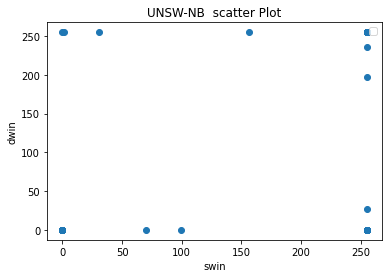

In [ ]:
#Visualize data
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(data['swin'], data['dwin'])
# set a title and labels
ax.set_title('UNSW-NB  scatter Plot')
ax.set_xlabel('swin')
ax.set_ylabel('dwin')
ax.legend()


/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


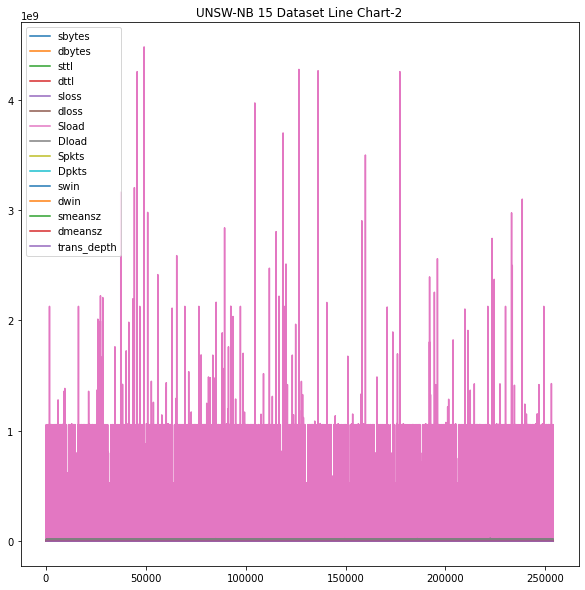

In [ ]:
columns = ['sbytes','dbytes','sttl','dttl','sloss','dloss','Sload','Dload','Spkts','Dpkts','swin','dwin','smeansz','dmeansz','trans_depth']

# create x data
x_data = range(0, data.shape[0])

# create figure and axis
fig, ax = plt.subplots(figsize=(10,10))

# plot each column
for column in columns:
    ax.plot(x_data, data[column], label=column)

# set title and legend
ax.set_title('UNSW-NB 15 Dataset Line Chart-2')
ax.legend()


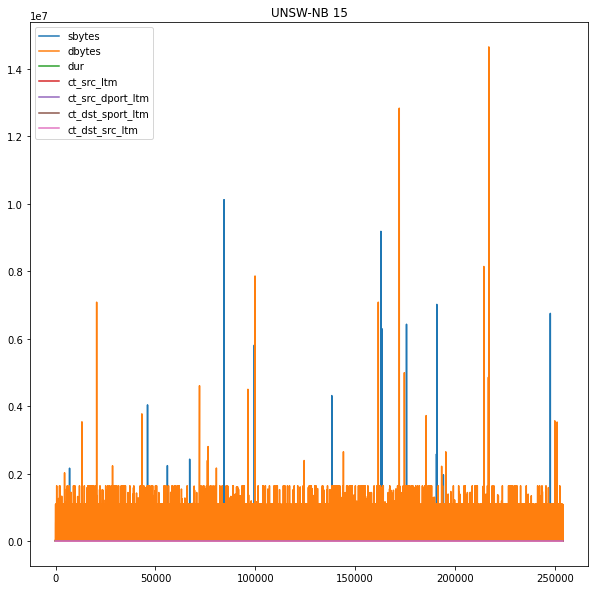

In [ ]:
columns = ['sbytes','dbytes','dur','ct_src_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm',]
# create x data
x_data = range(0, data.shape[0])
# create figure and axis
fig, ax = plt.subplots(figsize=(10,10))
# plot each column
for column in columns:
    ax.plot(x_data, data[column], label=column)
# set title and legend
ax.set_title('UNSW-NB 15')
ax.legend()


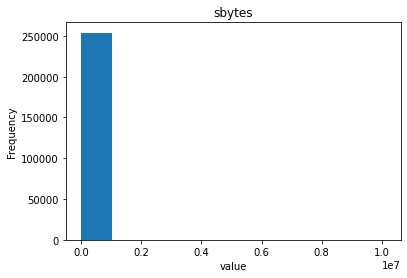

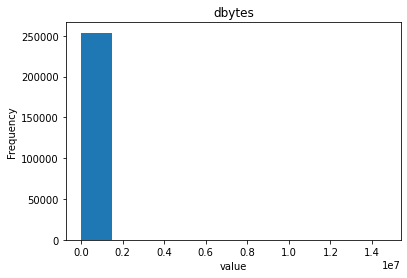

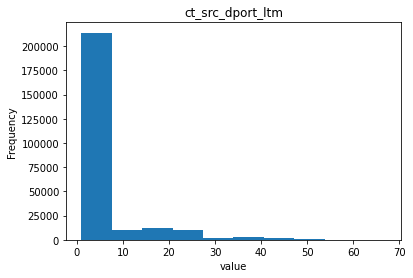

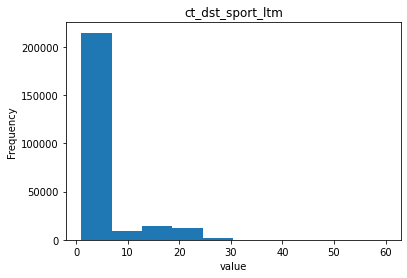

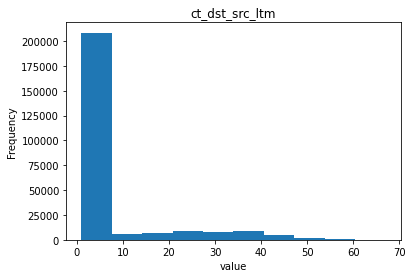

In [ ]:
#Histograms 



# columns = ['sbytes','dbytes','dur','sttl','dttl','sloss','dloss','Sload','Dload','Spkts','Dpkts','swin','dwin','smeansz','dmeansz','trans_depth','res_bdy_len','Sjit',
#           'Djit','Sintpkt','Dintpkt','tcprtt','synack','ackdat','ct_srv_src','ct_srv_dst','ct_dst_ltm','ct_src_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm']
columns = ['sbytes','dbytes','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm']

for i in range(len(columns)):
    fig, ax = plt.subplots()

    # plot histogram
    ax.hist(data[columns[i]])
    
    # set title and labels
    ax.set_title(columns[i])
    ax.set_xlabel('value')
    ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

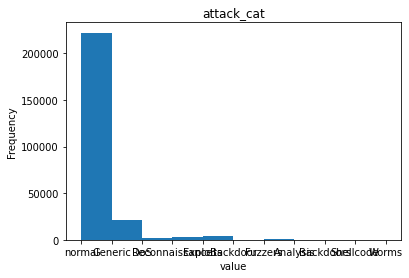

In [ ]:
#On attack_cat

fig, ax = plt.subplots()

# plot histogram
ax.hist(data['attack_cat'])

# set title and labels
ax.set_title('attack_cat')
ax.set_xlabel('value')
ax.set_ylabel('Frequency')


0


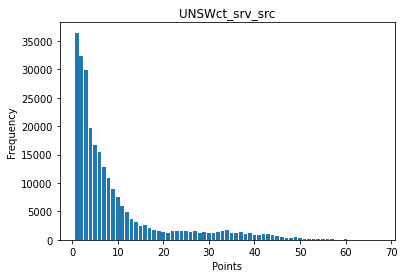

1


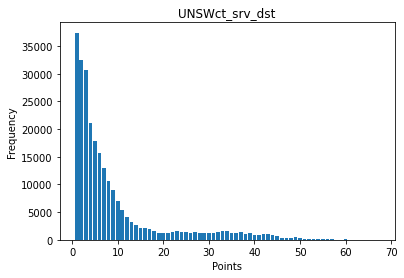

2


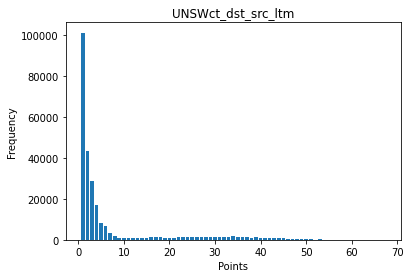

3


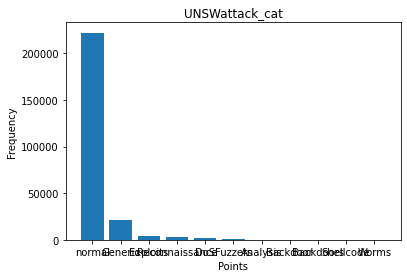

4


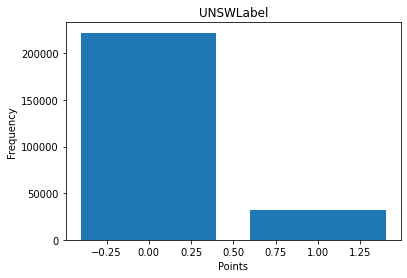

In [ ]:
# Bar Charts


# columns = ['ct_srv_src','ct_srv_dst','ct_dst_ltm','ct_src_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm',
#           'attack_cat','Label']
columns = ['ct_srv_src','ct_srv_dst','ct_dst_src_ltm','attack_cat','Label']
for i in range(len(columns)):
    print(i)

    # create a figure and axis 
    fig, ax = plt.subplots() 
    
    # count the occurrence of each class 
    data1 = data[columns[i]].value_counts() 
    
    # get x and y data 
    points = data1.index 
    frequency = data1.values 
    
    # create bar chart 
    ax.bar(points, frequency) 
    
    # set title and labels 
    ax.set_title('UNSW' + columns[i]) 
    ax.set_xlabel('Points') 
    ax.set_ylabel('Frequency')
    plt.show()


# Model Training-Phase

In [ ]:
# Now that the data is all set, let's split it into training and test. I'll be using 80% of it.


In [ ]:
(trainingData, testData) = sdf1.randomSplit([0.8, 0.2],seed = 11)


In [ ]:
trainingData.show(5)


+---+----------+------+------+----+----+-----+-----+--------+---------+---------+-----+-----+----+----+-------+-------+-----------+-----------+---------+---------+---------+---------+------------+------------+------------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+------+------+----+--------------------+
| id|       dur|sbytes|dbytes|sttl|dttl|sloss|dloss| service|    Sload|    Dload|Spkts|Dpkts|swin|dwin|smeansz|dmeansz|trans_depth|res_bdy_len|     Sjit|     Djit|  Sintpkt|  Dintpkt|      tcprtt|      synack|      ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|Label|xProto|xState|xSer|            features|
+---+----------+------+------+----+----+-----+-----+--------+---------+---------+-----+-----+----+----+-------+---

In [ ]:
testData.show(5)


+---+------------+------+------+----+----+-----+-----+-------+---------+-----------+-----+-----+----+----+-------+-------+-----------+-----------+---------+---------+----------+------------+------------+------------+--------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+------+------+----+--------------------+
| id|         dur|sbytes|dbytes|sttl|dttl|sloss|dloss|service|    Sload|      Dload|Spkts|Dpkts|swin|dwin|smeansz|dmeansz|trans_depth|res_bdy_len|     Sjit|     Djit|   Sintpkt|     Dintpkt|      tcprtt|      synack|  ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|Label|xProto|xState|xSer|            features|
+---+------------+------+------+----+----+-----+-----+-------+---------+-----------+-----+-----+----+----+--

In [ ]:
#Counting toatal no of rows in training and testing data

print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))


Training Dataset Count: 202860
Test Dataset Count: 51114


In [ ]:
trainingData.columns


['id',
 'dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'dloss',
 'service',
 'Sload',
 'Dload',
 'Spkts',
 'Dpkts',
 'swin',
 'dwin',
 'smeansz',
 'dmeansz',
 'trans_depth',
 'res_bdy_len',
 'Sjit',
 'Djit',
 'Sintpkt',
 'Dintpkt',
 'tcprtt',
 'synack',
 'ackdat',
 'is_sm_ips_ports',
 'ct_state_ttl',
 'ct_flw_http_mthd',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_dst_ltm',
 'ct_src_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'attack_cat',
 'Label',
 'xProto',
 'xState',
 'xSer',
 'features']

In [ ]:
#Arranging all the columns 
#Arranging all the columns with craeting a new dataframe of teaining and test data


data1 = trainingData.select('id','xProto','xState','xSer','dur','sbytes','dbytes','sttl','dttl','sloss','dloss','service','Sload',
                    'Dload','Spkts','Dpkts','swin','dwin','smeansz','dmeansz','trans_depth','res_bdy_len','Sjit','Djit',
                    'Sintpkt','Dintpkt','tcprtt','synack','ackdat','is_sm_ips_ports','ct_state_ttl','ct_flw_http_mthd','is_ftp_login',
                    'ct_ftp_cmd','ct_srv_src','ct_srv_dst','ct_dst_ltm','ct_src_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm',
                    'attack_cat','features','Label')
data2 = testData.select('id','xProto','xState','xSer','dur','sbytes','dbytes','sttl','dttl','sloss','dloss','service','Sload',
                    'Dload','Spkts','Dpkts','swin','dwin','smeansz','dmeansz','trans_depth','res_bdy_len','Sjit','Djit',
                    'Sintpkt','Dintpkt','tcprtt','synack','ackdat','is_sm_ips_ports','ct_state_ttl','ct_flw_http_mthd','is_ftp_login',
                    'ct_ftp_cmd','ct_srv_src','ct_srv_dst','ct_dst_ltm','ct_src_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm',
                    'attack_cat','features','Label')


### Binary Classification 
#### Linear SVM

In [ ]:
#Linear SVC

svm = LinearSVC(labelCol="Label", featuresCol="features")

#fitting training data data1
svm_model = svm.fit(data1)

#Transforming test data data2 by fitted model 
svm_prediction = svm_model.transform(data2)

#showing predicted model
svm_prediction.select("prediction", "Label", "features").show()


#Evaluating predicted model using BinaryClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="Label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")


#Accuracy of our model
svm_accuracy = evaluator.evaluate(svm_prediction)
print("Accuracy of Support Vector Machine is = %g"% (svm_accuracy))
print("Test Error of Support Vector Machine = %g " % (1.0 - svm_accuracy))


+----------+-----+--------------------+
|prediction|Label|            features|
+----------+-----+--------------------+
|       0.0|    0|[146.0,178.0,9.56...|
|       0.0|    0|[1540.0,1644.0,0....|
|       0.0|    0|[1684.0,10168.0,1...|
|       0.0|    0|[568.0,312.0,0.00...|
|       0.0|    0|[146.0,178.0,0.00...|
|       0.0|    0|[19306.0,1087890....|
|       0.0|    0|[1580.0,10168.0,1...|
|       0.0|    0|[520.0,304.0,0.00...|
|       0.0|    0|[320.0,1800.0,0.0...|
|       0.0|    0|[3390.0,42716.0,0...|
|       0.0|    0|[1470.0,1728.0,0....|
|       0.0|    0|(31,[0,1,2,7,8,9,...|
|       0.0|    0|[146.0,178.0,0.00...|
|       0.0|    0|[132.0,164.0,0.00...|
|       0.0|    0|[568.0,312.0,0.51...|
|       0.0|    0|[3728.0,5474.0,0....|
|       0.0|    0|[130.0,162.0,0.00...|
|       0.0|    0|[3390.0,42716.0,0...|
|       0.0|    0|[2750.0,28086.0,0...|
|       0.0|    0|[130.0,162.0,0.00...|
+----------+-----+--------------------+
only showing top 20 rows

Accuracy of Su

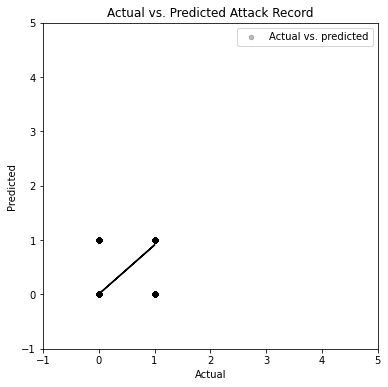

In [ ]:
#Plotting Actual and predicted output of Label column

%matplotlib inline

#Converting dataframe into pandas dataframe
sbdf = svm_prediction.select('prediction','Label').toPandas()

# PLOT 
ax = sbdf.plot(kind='scatter', figsize = (6,6), x='prediction', y='Label', color='black', alpha = 0.25, label='Actual vs. predicted')
fit = np.polyfit(sbdf['prediction'], sbdf['Label'], deg=1)
ax.set_title('Actual vs. Predicted Attack Record')
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.legend()
ax.plot(sbdf['prediction'], fit[0] * sbdf['prediction'] + fit[1], color='black')
plt.axis([-1, 5, -1, 5])
plt.show(ax)


In [ ]:
#Confusion matrix 


tp = float(svm_prediction.filter("prediction == 1.0 AND Label == 1").count())
fp = float(svm_prediction.filter("prediction == 1.0 AND Label == 0").count())
tn = float(svm_prediction.filter("prediction == 0.0 AND Label == 0").count())
fn = float(svm_prediction.filter("prediction == 0.0 AND Label == 1").count())
pr = tp / (tp + fp)
re = tp / (tp + fn)


print( tp, "     ", fp)
print( fn, "     ", tn)
print('\n')
metrics = sparkSession.createDataFrame([
 ("TP", tp),
 ("FP", fp),
 ("TN", tn),
 ("FN", fn),
 ("Precision", pr),
 ("Recall", re),
 ("F1", 2*pr*re/(re+pr))],["metric", "value"])
metrics.toPandas()


6160.0       606.0
244.0       44077.0




,metric,value
0,TP,6160.000000
1,FP,606.000000
2,TN,44077.000000
3,FN,244.000000
4,Precision,0.910435
5,Recall,0.961899
6,F1,0.935459


Outcome values : 
 6160.0 244.0 606.0 44077.0


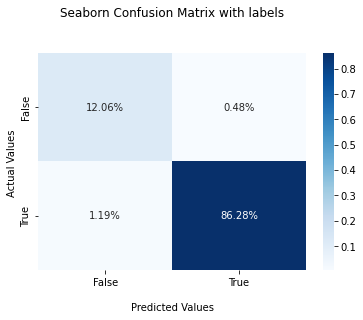

In [ ]:
# confusion matrix in sklearn

print('Outcome values : \n', tp, fn, fp, tn)

cf_matrix=[[6160,244],[606,44077]]
import seaborn as sns

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


### Multi Class Classification
#### Decision Tree Classifier

In [ ]:
#Before applying Decision Tree Classifier on our data set we will do the following work on our data set:

#Vectorizing columns

colmss = ['xState','xSer','sbytes','dbytes','dur','sttl','dttl','sloss','dloss','Sload','Dload','Spkts','Dpkts','swin','dwin','smeansz','dmeansz','trans_depth','res_bdy_len','Sjit',
          'Djit','Sintpkt','Dintpkt','tcprtt','synack','ackdat','Label']
feature = VectorAssembler(inputCols= colmss[:],outputCol="features")
sdf1 = feature.transform(sdf)


In [ ]:
# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="attack_cat", outputCol="indexedLabel").fit(sdf1)
# Automatically identify categorical features, and index them.
# We specify maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories= 15).fit(sdf1)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = sdf1.randomSplit([0.7, 0.3])

# Train a DecisionTree model.
dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures")

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dt])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "indexedLabel", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))

treeModel = model.stages[2]
print(treeModel) # summary only
print("Accuracy = ", accuracy)


+----------+------------+--------------------+
|prediction|indexedLabel|            features|
+----------+------------+--------------------+
|       0.0|         0.0|[0.0,0.0,1540.0,1...|
|       0.0|         0.0|[0.0,0.0,1540.0,1...|
|       0.0|         0.0|(27,[0,2,3,4,5,6,...|
|       0.0|         0.0|[0.0,0.0,2974.0,3...|
|       0.0|         0.0|[0.0,0.0,1540.0,1...|
+----------+------------+--------------------+
only showing top 5 rows

Test Error = 0.0196856
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_41d68b6ba774, depth=5, numNodes=23, numClasses=11, numFeatures=27
Accuracy =  0.9803144422205836


In [ ]:
tree = model.stages[-1]

display(tree) #visualize the decision tree model
print(tree.toDebugString) #print the nodes of the decision tree model


DecisionTreeClassificationModel: uid=DecisionTreeClassifier_41d68b6ba774, depth=5, numNodes=23, numClasses=11, numFeatures=27

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_41d68b6ba774, depth=5, numNodes=23, numClasses=11, numFeatures=27
  If (feature 26 in {0.0})
   Predict: 0.0
  Else (feature 26 not in {0.0})
   If (feature 1 in {1.0,6.0,11.0})
    If (feature 2 <= 120.0)
     If (feature 0 in {2.0})
      If (feature 5 in {11.0})
       Predict: 1.0
      Else (feature 5 not in {11.0})
       Predict: 4.0
     Else (feature 0 not in {2.0})
      If (feature 4 <= 0.0712425)
       Predict: 2.0
      Else (feature 4 > 0.0712425)
       Predict: 4.0
    Else (feature 2 > 120.0)
     If (feature 4 <= 3.2957585)
      If (feature 5 in {7.0})
       Predict: 2.0
      Else (feature 5 not in {7.0})
       Predict: 4.0
     Else (feature 4 > 3.2957585)
      If (feature 1 in {1.0})
       Predict: 3.0
      Else (feature 1 not in {1.0})
       Predict: 1.0
   Else (feature 1 not in {1.0,6.0,11.0})
    If (feature 5 in {0.0,7.0,12.0})
     Predict: 2.0
    Else (feature 5 not in {0.0,7.0,12.0})
     

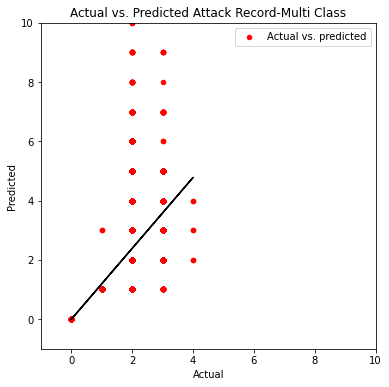

In [ ]:
#Plot Between Actual and Predicted attck_cat
%matplotlib inline

sbdf = predictions.select('prediction','indexedLabel').toPandas()

# PLOT 
ax = sbdf.plot(kind='scatter', figsize = (6,6), x='prediction', y='indexedLabel', color='red', alpha = 1, label='Actual vs. predicted')
fit = np.polyfit(sbdf['prediction'], sbdf['indexedLabel'], deg=1)
ax.set_title('Actual vs. Predicted Attack Record-Multi Class')
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.plot(sbdf['prediction'], fit[0] * sbdf['prediction'] + fit[1], color='black')
plt.axis([-1, 10, -1, 10])
plt.show(ax)


In [ ]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/task_c/unsw-UEL.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/task_c/myschoolwork.ipynb to html
[NbConvertApp] Writing 1064233 bytes to /content/drive/MyDrive/task_c/myschoolwork.html


# ***Finale!! UEL_Schoolwork*** 